In [63]:
# load packages
import pandas as pd
import statsmodels.tsa.stattools as stats
import statsmodels.graphics.tsaplots as sg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import sys
from datetime import datetime
import numpy as np

import networkx as nx
from nxpd import draw
from nxpd import nxpdParams
nxpdParams['show'] = 'ipynb'

sys.path.append("../pipelines")
import Pipelines as tdw
data_folder = "/projects/p20519/roller_output/optimizing_window_size/RandomForest/insilico_size10_1/"

output_path = "/home/jjw036/Roller/insilico_size10_1"

current_time = datetime.now().strftime('%Y-%m-%d_%H:%M:%S')

data_folder = "../output/insilico_size10_1"
file_path = "../data/gnw_insilico/network_data/Yeast/Yeast-3_timeseries.tsv"
run_params = {'data_folder': data_folder,
              'file_path':file_path,
              'td_window':10,
              'min_lag':1,
              'max_lag':3,
              'n_trees':10,
              'permutation_n':10,
              'lag_method':'mean_mean',
              'calc_mse':False,
              'bootstrap_n':1000,
              'n_trials':1,
              'run_time':current_time,
              'sort_by':'rank',
              'iterating_param':'td_window',
              }
            

roc,pr, tdr = tdw.get_td_stats(**run_params)

['Time', 'G1', 'G2', 'G3', 'G4', 'G5', 'G6', 'G7', 'G8', 'G9', 'G10']
Running permutation on window 3...
Running permutation on window 4...
Running permutation on window 5...
Running permutation on window 6...
Running permutation on window 7...
Running permutation on window 8...
Running permutation on window 9...
Running permutation on window 10...
Running permutation on window 11...
Compiling all model edges...
[DONE]
Lumping edges...
[DONE]

/Users/jjw036/Roller/Swing/Swing.py:564: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  current_df.sort(['adj_imp'], ascending=False, inplace=True)
/Users/jjw036/Roller/Swing/Swing.py:690: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  sort_df.sort(sort_field, ascending=True, inplace=True)



Calculating rank edge importance...
[DONE]
90
Scoring model...
[DONE]
0.727272727273
0.275361990719


In [15]:
def get_experiment_list(filename):
    # load files
    timecourse = pd.read_csv(filename, sep="\t")
    # divide into list of dataframes
    experiments = []
    expected_experiments = 10
    for i in range(0,expected_experiments*20 ,21):
        experiments.append(timecourse.ix[i:i+20])
    
    #reformat
    for idx,exp in enumerate(experiments):
        exp = exp.set_index('Time')
        experiments[idx]=exp
    return(experiments)
    

In [16]:
experiments=get_experiment_list("../data/gnw_insilico/network_data/Yeast/Yeast-3_dream4_timeseries.tsv")

In [55]:
kinds = 10
colors = plt.get_cmap('hsv')(np.linspace(0, 0.8, kinds))

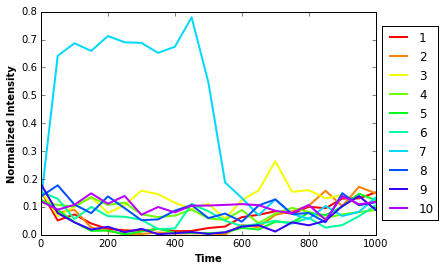

In [64]:
# plot time series for each experiment

for idx,experiment in enumerate(experiments):
    ax = experiment['G1'].plot(linewidth=2, label=str(idx+1), color=colors[idx])
    ax.set_ylabel('Normalized Intensity', fontweight='bold')
    ax.set_xlabel('Time',fontweight='bold')
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))


In [ ]:
tdr.